In [1]:
pip install pandas numpy matplotlib statsmodels scipy seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df= pd.read_csv("C:/Users/VOLKAN/Desktop/NY-House-Dataset.csv")

In [4]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
print(df.isnull().sum())  

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [7]:
df.describe(include='all')

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
count,4801,4801,4.801000e+03,4801.000000,4801.000000,4801.000000,4801,4801,4801,4801,4801,4801,4801,4801,4801,4801.000000,4801.000000
unique,1036,13,NaN,NaN,NaN,NaN,4582,308,4583,29,11,21,174,2731,4550,NaN,NaN
top,Brokered by COMPASS,Co-op for sale,NaN,NaN,NaN,NaN,2619 Shore Pkwy,"Brooklyn, NY 11235","2619 Shore PkwyBrooklyn, NY 11223",United States,New York,New York,Manhattan,2,"61-20 Grand Central Pkwy, Forest Hills, NY 113...",NaN,NaN
freq,456,1450,NaN,NaN,NaN,NaN,3,102,3,2484,2505,1016,979,20,4,NaN,NaN
mean,NaN,NaN,2.356940e+06,3.356801,2.373861,2184.207862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714227,-73.941601
std,NaN,NaN,3.135525e+07,2.602315,1.946962,2377.140894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087676,0.101082
min,NaN,NaN,2.494000e+03,1.000000,0.000000,230.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.499546,-74.253033
25%,NaN,NaN,4.990000e+05,2.000000,1.000000,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.639375,-73.987143
50%,NaN,NaN,8.250000e+05,3.000000,2.000000,2184.207862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726749,-73.949189
75%,NaN,NaN,1.495000e+06,4.000000,3.000000,2184.207862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.771923,-73.870638


In [8]:
df.max()

BROKERTITLE                                                             NoBroker
TYPE                                                          Townhouse for sale
PRICE                                                                 2147483647
BEDS                                                                          50
BATH                                                                        50.0
PROPERTYSQFT                                                             65535.0
ADDRESS                                                              Waldron Ave
STATE                                                         Woodside, NY 11377
MAIN_ADDRESS                                  Waldron AveStaten Island, NY 10301
ADMINISTRATIVE_AREA_LEVEL_2                                        United States
LOCALITY                                                           United States
SUBLOCALITY                                                            The Bronx
STREET_NAME                 

In [9]:
df.min()

BROKERTITLE                              Brokered by 1 Oak Real Estate Hub Inc
TYPE                                                            Co-op for sale
PRICE                                                                     2494
BEDS                                                                         1
BATH                                                                       0.0
PROPERTYSQFT                                                             230.0
ADDRESS                                             1 Central Park S Unit 1801
STATE                                                        Arverne, NY 11692
MAIN_ADDRESS                     1 Central Park S Unit 1801Manhattan, NY 10019
ADMINISTRATIVE_AREA_LEVEL_2                                              10002
LOCALITY                                                          Bronx County
SUBLOCALITY                                                       Bronx County
STREET_NAME                                         

In [10]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [11]:
TYPE=df[["TYPE"]]
print(TYPE)

                    TYPE
0         Condo for sale
1         Condo for sale
2         House for sale
3         Condo for sale
4     Townhouse for sale
...                  ...
4796      Co-op for sale
4797      Co-op for sale
4798      Co-op for sale
4799      Condo for sale
4800      Co-op for sale

[4801 rows x 1 columns]


In [12]:
SUBLOCALITY=df[["SUBLOCALITY"]]

print(SUBLOCALITY)

          SUBLOCALITY
0           Manhattan
1     New York County
2     Richmond County
3     New York County
4     New York County
...               ...
4796         New York
4797    Queens County
4798  New York County
4799           Queens
4800         Brooklyn

[4801 rows x 1 columns]


In [13]:
BROKER=df[["BROKERTITLE"]]
print(BROKER)

                                            BROKERTITLE
0           Brokered by Douglas Elliman  -111 Fifth Ave
1                                   Brokered by Serhant
2                                Brokered by Sowae Corp
3                                   Brokered by COMPASS
4     Brokered by Sotheby's International Realty - E...
...                                                 ...
4796                                Brokered by COMPASS
4797                    Brokered by Mjr Real Estate Llc
4798      Brokered by Douglas Elliman - 575 Madison Ave
4799            Brokered by E Realty International Corp
4800                 Brokered by Nyc Realty Brokers Llc

[4801 rows x 1 columns]


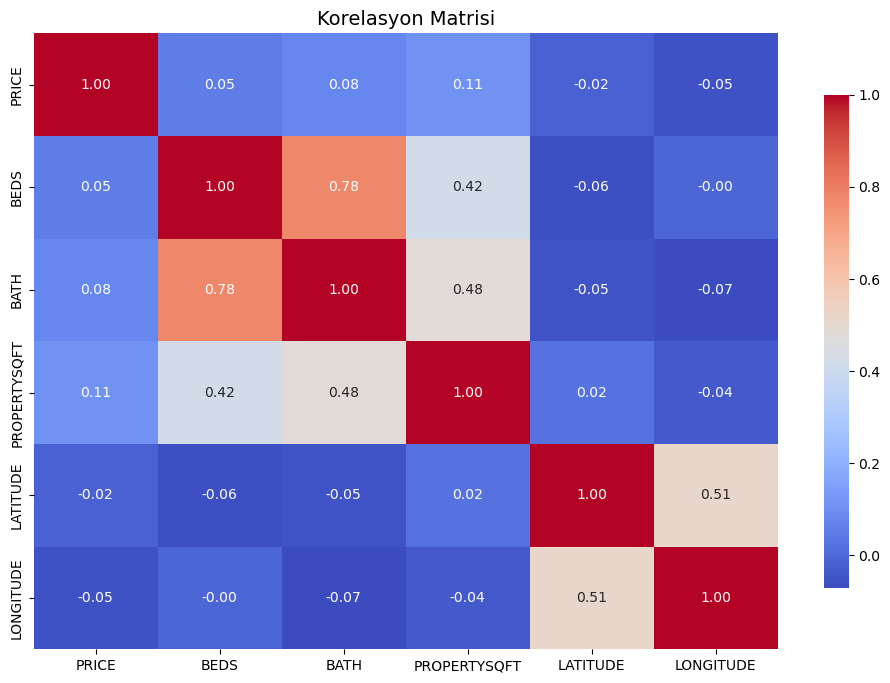

In [14]:
# Veri dağılımını görselleştirme (Heatmap)
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Korelasyon Matrisi', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### TEKRAR EDEN BROKERTITLE ###

In [16]:
BROKERTITLE = df[df.duplicated('BROKERTITLE', keep=False)]

In [17]:
BROKERTITLE = BROKERTITLE['BROKERTITLE'].unique()
print(BROKERTITLE)

['Brokered by Douglas Elliman  -111 Fifth Ave' 'Brokered by Serhant'
 'Brokered by Sowae Corp' 'Brokered by COMPASS'
 "Brokered by Sotheby's International Realty - East Side Manhattan Brokerage"
 'Brokered by Douglas Elliman - 575 Madison Ave'
 'Brokered by Connie Profaci Realty' 'Brokered by Pantiga Group Inc.'
 'Brokered by CENTURY 21 MK Realty' 'Brokered by Re/Max Edge'
 'Brokered by Jamie & Connie Real Estate Grp'
 'Brokered by Corcoran Chelsea/Flatiron' 'Brokered by Awaye Realty'
 'Brokered by Realty Executives Today' 'Brokered by Dorsa Group Realty'
 'Brokered by Coldwell Banker Realty'
 'Brokered by Keller Williams Rlty Landmark'
 'Brokered by Radiant Estates LLC' 'Brokered by Apaus, Inc'
 'Brokered by Keller Williams Ny Realty'
 'Brokered by Martino Realty Group'
 'Brokered by CENTURY 21 Milestone Realty'
 'Brokered by Nest Seekers International, Long Island'
 'Brokered by Century 21 Realty First' 'Brokered by Ashford Homes'
 'NoBroker' 'Brokered by Get Listed Get Sold NYC'
 'B

In [18]:
BROKERTITLE_yeni= df['BROKERTITLE'].value_counts()
print(BROKERTITLE_yeni)

BROKERTITLE
Brokered by COMPASS                              456
Brokered by Douglas Elliman - 575 Madison Ave    110
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    91
Brokered by RE MAX Edge                           79
                                                ... 
Brokered by Gerard R Desgranges                    1
Brokered by Property Professional Realty           1
Brokered by Mark Murphy Properties                 1
Brokered by S Sharf Realty Inc                     1
Brokered by New York Way Real Estate Corp          1
Name: count, Length: 1036, dtype: int64


### tekrar eden LOCALITY ###

In [20]:
LOCALITY=df["LOCALITY"].value_counts()
print(LOCALITY)

LOCALITY
New York           2505
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Brooklyn              6
Queens                6
The Bronx             5
Flatbush              1
Name: count, dtype: int64


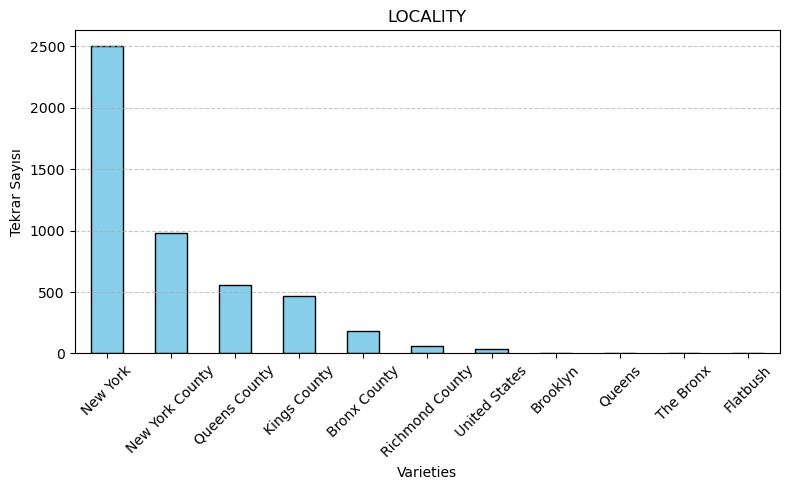

In [21]:
plt.figure(figsize=(8, 5))
LOCALITY.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("LOCALITY")
plt.xlabel("Varieties")
plt.ylabel("Tekrar Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### tekrar eden TYPE ###

In [23]:
TYPE=df["TYPE"].value_counts()
print(TYPE)

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64


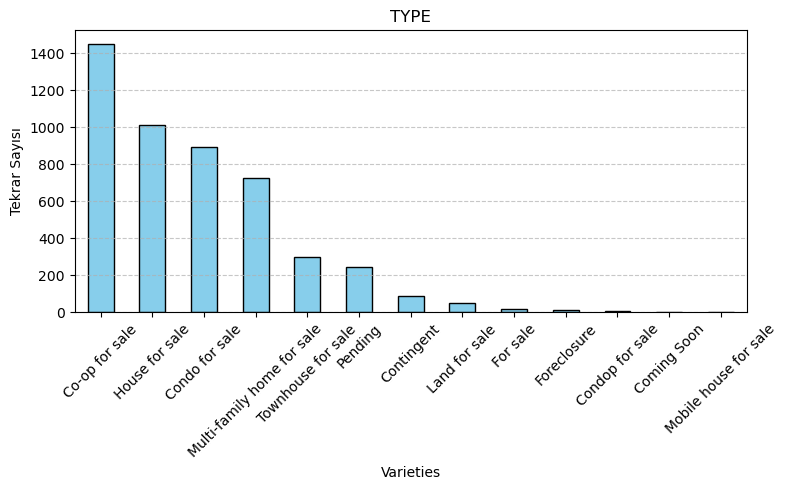

In [24]:
plt.figure(figsize=(8, 5))
TYPE.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("TYPE")
plt.xlabel("Varieties")
plt.ylabel("Tekrar Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
#istatistik kısım

In [26]:
PR= df["PRICE"].mean()
PR

2356940.17100604

In [27]:
sampled_data = df.sample(n=50, replace=True, random_state=42)

In [28]:
sampled_data.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
860,Brokered by RE/MAX Team,House for sale,1289000,4,4.0,2184.207862,257-03 80th Ave,"Glen Oaks, NY 11004","257-03 80th AveGlen Oaks, NY 11004",United States,New York,Queens County,Queens,80th Avenue,"257-03 80th Ave, Queens, NY 11004, USA",40.744526,-73.713743
3772,Brokered by Keller Williams Realty NYC Grp,House for sale,775000,3,1.0,1696.000000,1217 Fairfax Ave,"Bronx, NY 10465","1217 Fairfax AveBronx, NY 10465",United States,New York,Bronx County,The Bronx,Fairfax Avenue,"1217 Fairfax Ave, Bronx, NY 10465, USA",40.837740,-73.824147
3092,Brokered by City Realty Group,Co-op for sale,449000,2,1.0,2184.207862,99-72 66 Rd Unit 7C,"Rego Park, NY 11374","99-72 66 Rd Unit 7CRego Park, NY 11374",New York,Queens County,Queens,Rego Park,99-72,"99-72 66th Rd #7c, Rego Park, NY 11374, USA",40.728235,-73.852209
466,Brokered by COMPASS,House for sale,1230250,3,2.0,1590.000000,70-17 Nansen St,"Queens, NY 11375","70-17 Nansen StQueens, NY 11375",United States,New York,Queens County,Queens,Nansen Street,"70-17 Nansen St, Flushing, NY 11375, USA",40.712096,-73.851808
4426,Brokered by Brown Harris Stevens - 445 Park Av...,Co-op for sale,3275000,3,3.0,2184.207862,8 E 83rd St Units 11 & 12D,"Manhattan, NY 10028","8 E 83rd St Units 11 & 12DManhattan, NY 10028",New York,New York County,New York,Manhattan,8,"8 East 83rd St Tenants Corporation, 8 E 83rd S...",40.779101,-73.961095
3444,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,2980000,3,3.0,1756.000000,1280 Fifth Ave Ph B,"New York, NY 10029","1280 Fifth Ave Ph BNew York, NY 10029",United States,New York,New York County,New York,5th Avenue,"1280 5th Ave, New York, NY 10029, USA",40.796189,-73.949116
3171,Brokered by CHRISTIE'S INT.REAL ESTATE GROUP,Townhouse for sale,10750000,5,6.0,5771.000000,123 E 80th St,"New York, NY 10075","123 E 80th StNew York, NY 10075",United States,New York,New York County,New York,East 80th Street,"123 E 80th St, New York, NY 10075, USA",40.776067,-73.958818
2919,Brokered by Corcoran Park Slope,Townhouse for sale,4195000,5,4.0,2184.207862,445 Waverly Ave,"Brooklyn, NY 11238","445 Waverly AveBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Waverly Avenue,"445 Waverly Ave, Brooklyn, NY 11238, USA",40.684793,-73.965911
130,Brokered by COMPASS,Condo for sale,499000,1,1.0,630.000000,157 E 72nd St Apt 8I,"Manhattan, NY 10021","157 E 72nd St Apt 8IManhattan, NY 10021",New York,New York County,New York,Manhattan,157,"157 E 72nd St #8i, New York, NY 10021, USA",40.770232,-73.961016
1685,Brokered by Berkshire Hathaway HomeServices Ne...,Co-op for sale,339000,2,2.0,906.000000,86C Edgewater Park Unit C,"Bronx, NY 10465","86C Edgewater Park Unit CBronx, NY 10465",United States,New York,Bronx County,The Bronx,Edgewater Park,"86 Edgewater Park, Bronx, NY 10465, USA",40.822472,-73.811060


In [29]:
sample_mean = sampled_data['PRICE'].mean()
sample_mean

1933998.68

In [30]:
estimate_list = []
for i in range(10000):
    estimate_list.append(df['PRICE'].sample(n=50,replace=True).mean())

In [31]:
estimate_df = pd.DataFrame(data={'PRICE': estimate_list})
estimate_df

,PRICE
0,1908007.98
1,1098987.96
2,1227496.94
3,1430573.84
4,1728159.92
...,...
9995,1740173.70
9996,1474435.90
9997,1408977.70
9998,2966866.96


In [32]:
mean_sample_means = estimate_df['PRICE'].mean()
mean_sample_means

2382282.39463

<Axes: >

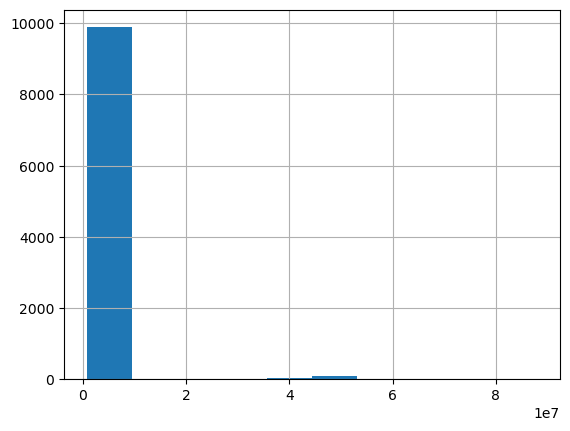

In [33]:
estimate_df['PRICE'].hist()

In [34]:
standard_error = sampled_data['PRICE'].std() / np.sqrt(len(sampled_data))
standard_error

545381.0195551405

In [35]:
population_mean = estimate_df['PRICE'].mean()
population_mean

2382282.39463

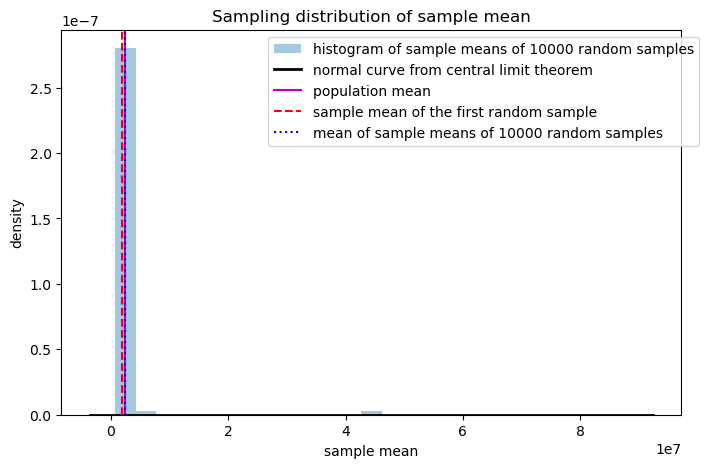

In [36]:
 # Generate a grid of 100 values from xmin to xmax.

 ### YOUE CODE HERE ###
plt.figure(figsize=(8,5))
plt.hist(estimate_df['PRICE'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

In [37]:
#Enlem_ortalama = EO

In [38]:
EO= df["LONGITUDE"].mean()
EO

-73.94160121297645

In [39]:
sampled_data = df.sample(n=50, replace=True, random_state=42)

In [40]:
sampled_data.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
860,Brokered by RE/MAX Team,House for sale,1289000,4,4.0,2184.207862,257-03 80th Ave,"Glen Oaks, NY 11004","257-03 80th AveGlen Oaks, NY 11004",United States,New York,Queens County,Queens,80th Avenue,"257-03 80th Ave, Queens, NY 11004, USA",40.744526,-73.713743
3772,Brokered by Keller Williams Realty NYC Grp,House for sale,775000,3,1.0,1696.000000,1217 Fairfax Ave,"Bronx, NY 10465","1217 Fairfax AveBronx, NY 10465",United States,New York,Bronx County,The Bronx,Fairfax Avenue,"1217 Fairfax Ave, Bronx, NY 10465, USA",40.837740,-73.824147
3092,Brokered by City Realty Group,Co-op for sale,449000,2,1.0,2184.207862,99-72 66 Rd Unit 7C,"Rego Park, NY 11374","99-72 66 Rd Unit 7CRego Park, NY 11374",New York,Queens County,Queens,Rego Park,99-72,"99-72 66th Rd #7c, Rego Park, NY 11374, USA",40.728235,-73.852209
466,Brokered by COMPASS,House for sale,1230250,3,2.0,1590.000000,70-17 Nansen St,"Queens, NY 11375","70-17 Nansen StQueens, NY 11375",United States,New York,Queens County,Queens,Nansen Street,"70-17 Nansen St, Flushing, NY 11375, USA",40.712096,-73.851808
4426,Brokered by Brown Harris Stevens - 445 Park Av...,Co-op for sale,3275000,3,3.0,2184.207862,8 E 83rd St Units 11 & 12D,"Manhattan, NY 10028","8 E 83rd St Units 11 & 12DManhattan, NY 10028",New York,New York County,New York,Manhattan,8,"8 East 83rd St Tenants Corporation, 8 E 83rd S...",40.779101,-73.961095
3444,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,2980000,3,3.0,1756.000000,1280 Fifth Ave Ph B,"New York, NY 10029","1280 Fifth Ave Ph BNew York, NY 10029",United States,New York,New York County,New York,5th Avenue,"1280 5th Ave, New York, NY 10029, USA",40.796189,-73.949116
3171,Brokered by CHRISTIE'S INT.REAL ESTATE GROUP,Townhouse for sale,10750000,5,6.0,5771.000000,123 E 80th St,"New York, NY 10075","123 E 80th StNew York, NY 10075",United States,New York,New York County,New York,East 80th Street,"123 E 80th St, New York, NY 10075, USA",40.776067,-73.958818
2919,Brokered by Corcoran Park Slope,Townhouse for sale,4195000,5,4.0,2184.207862,445 Waverly Ave,"Brooklyn, NY 11238","445 Waverly AveBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Waverly Avenue,"445 Waverly Ave, Brooklyn, NY 11238, USA",40.684793,-73.965911
130,Brokered by COMPASS,Condo for sale,499000,1,1.0,630.000000,157 E 72nd St Apt 8I,"Manhattan, NY 10021","157 E 72nd St Apt 8IManhattan, NY 10021",New York,New York County,New York,Manhattan,157,"157 E 72nd St #8i, New York, NY 10021, USA",40.770232,-73.961016
1685,Brokered by Berkshire Hathaway HomeServices Ne...,Co-op for sale,339000,2,2.0,906.000000,86C Edgewater Park Unit C,"Bronx, NY 10465","86C Edgewater Park Unit CBronx, NY 10465",United States,New York,Bronx County,The Bronx,Edgewater Park,"86 Edgewater Park, Bronx, NY 10465, USA",40.822472,-73.811060


In [41]:
sample_mean = sampled_data['LONGITUDE'].mean()
sample_mean

-73.935979046

In [42]:
estimate_list = []
for i in range(10000):
    estimate_list.append(df['LONGITUDE'].sample(n=50,replace=True).mean())

In [43]:

estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,-73.949978
1,-73.932862
2,-73.931951
3,-73.927757
4,-73.934626
...,...
9995,-73.943762
9996,-73.938852
9997,-73.932887
9998,-73.958987


In [44]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

-73.9415068817908

<Axes: >

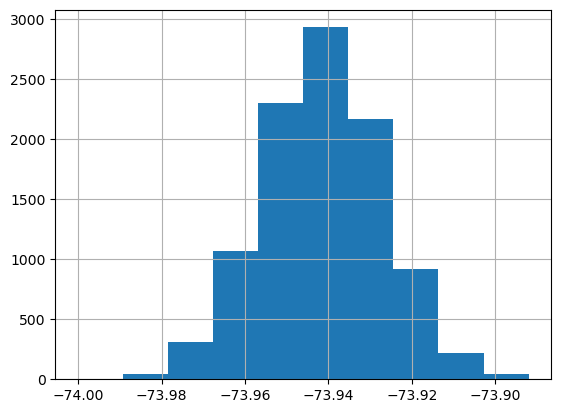

In [45]:
estimate_df['estimate'].hist()

In [46]:
standard_error = sampled_data['LONGITUDE'].std() / np.sqrt(len(sampled_data))
standard_error

0.014726987538979741

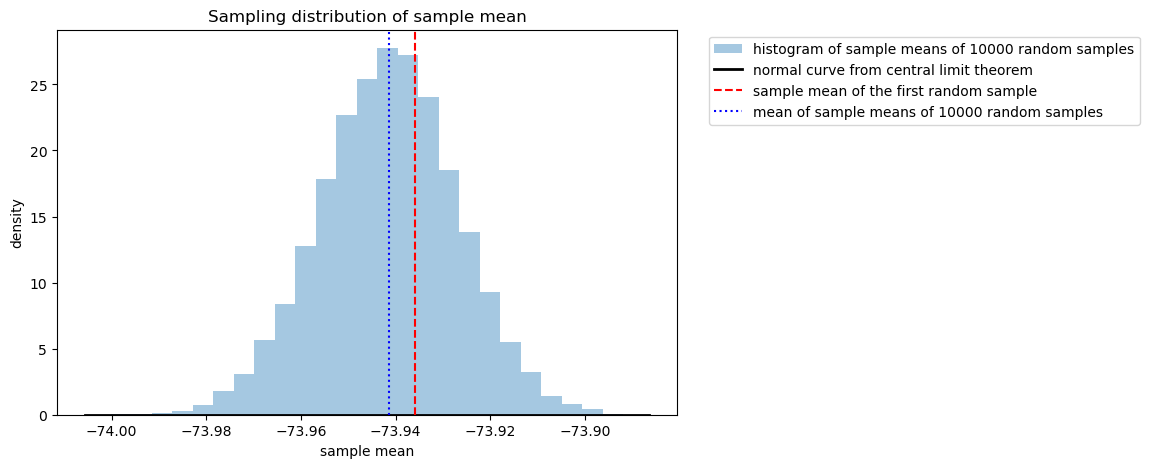

In [47]:
 # Generate a grid of 100 values from xmin to xmax.

 ### YOUE CODE HERE ###
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
#plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

  # Dosyayı buraya verebilirsin

# 2. Gerekli sütunları seç
features = ['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'STATE']
df = df[features + ['PRICE']]

# 3. Kategorik verileri encode et
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Train-test split
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modeli kur
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Tahmin ve değerlendirme
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 988047.481717737
R2 Score: 0.2809314848263176


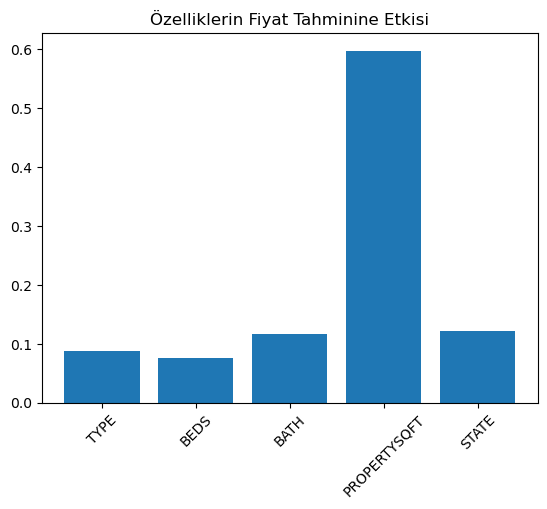

In [49]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.bar(X.columns, importance)
plt.xticks(rotation=45)
plt.title("Özelliklerin Fiyat Tahminine Etkisi")
plt.show()
